In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
iris = sns.load_dataset("iris")

In [3]:
iris = pd.DataFrame(iris)

In [4]:
def explore_dataset(data):
    print('########## SHAPE ##########')
    print(data.shape)
    print('########## HEAD ###########')
    print(data.head())
    print('########## TAIL ##########')
    print(data.tail())
    print('########## INFO ##########')
    print(data.info())
    print('########## DESCRIBE ##########')
    print(data.describe())

In [5]:
explore_dataset(iris)

########## SHAPE ##########
(150, 5)
########## HEAD ###########
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
########## TAIL ##########
     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica
########## INFO ##########
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data column

In [6]:
iris['new_sepal_length_width'] = iris['sepal_length'] / iris['sepal_width']
iris['new_petal_length_width'] = iris['petal_length'] / iris['petal_width']

In [7]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,new_sepal_length_width,new_petal_length_width
0,5.1,3.5,1.4,0.2,setosa,1.457143,7.000000
1,4.9,3.0,1.4,0.2,setosa,1.633333,7.000000
2,4.7,3.2,1.3,0.2,setosa,1.468750,6.500000
3,4.6,3.1,1.5,0.2,setosa,1.483871,7.500000
4,5.0,3.6,1.4,0.2,setosa,1.388889,7.000000
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2.233333,2.260870
146,6.3,2.5,5.0,1.9,virginica,2.520000,2.631579
147,6.5,3.0,5.2,2.0,virginica,2.166667,2.600000
148,6.2,3.4,5.4,2.3,virginica,1.823529,2.347826


In [8]:
def grab_col_names(data, cat_th=10, car_th=20):
    cat_cols = [col for col in data.columns if data[col].dtype == 'O']
    cat_but_num = [col for col in data.columns if data[col].dtype == 'O' and data[col].nunique() > cat_th]
    num_but_cat = [col for col in data.columns if data[col].dtype != 'O' and data[col].nunique() < cat_th]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_num]
    
    num_cols = [col for col in data.columns if data[col].dtype != 'O']
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    return cat_cols, cat_but_num, num_cols

In [9]:
cat_cols, cat_but_num, num_cols = grab_col_names(iris)

In [10]:
cat_cols

['species']

In [11]:
cat_but_num

[]

In [12]:
num_cols

['sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width',
 'new_sepal_length_width',
 'new_petal_length_width']

In [13]:
def interquantile(data, col_name, q1 = 0.05, q3 = 0.95):
    q_1 = data[col_name].quantile(q1)
    q_3 = data[col_name].quantile(q3)
    q_2 = q_1 - q_3
    down = q_1 - 1.5 * q_2
    up = q_3 + 1.5 * q_2
    return down, up

In [14]:
for col in num_cols:
    print(f'{col} columns interquantile range is : {interquantile(iris,col)}')

sepal_length columns interquantile range is : (8.582499999999998, 3.2725000000000004)
sepal_width columns interquantile range is : (4.5275, 1.6174999999999997)
petal_length columns interquantile range is : (8.5, -1.0999999999999996)
petal_width columns interquantile range is : (3.3499999999999996, -0.8499999999999996)
new_sepal_length_width columns interquantile range is : (3.23454831932773, 0.7306407563025212)
new_petal_length_width columns interquantile range is : (10.814347826086957, -0.4430434782608703)


In [15]:
def check_interquantile(data, col_name, q1=0.05, q3=0.95):
    down, up = interquantile(data, col_name, q1, q3)
    if data[(data[col] < down) | (data[col] > up)].any(None):
        return True
    else:
        return False

In [16]:
for col in num_cols:
    print(f'{col} columns has any outlier ? : {check_interquantile(iris, col,q1=0.05, q3=0.95)}')

sepal_length columns has any outlier ? : True
sepal_width columns has any outlier ? : True
petal_length columns has any outlier ? : True
petal_width columns has any outlier ? : True
new_sepal_length_width columns has any outlier ? : True
new_petal_length_width columns has any outlier ? : True


C:\Users\s7522\AppData\Local\Temp\ipykernel_884\1272339770.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if data[(data[col] < down) | (data[col] > up)].any(None):
C:\Users\s7522\AppData\Local\Temp\ipykernel_884\1272339770.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if data[(data[col] < down) | (data[col] > up)].any(None):
C:\Users\s7522\AppData\Local\Temp\ipykernel_884\1272339770.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if data[(data[col] < down) | (data[col] > up)].any(None):
C:\Users\s7522\AppData\Local\Temp\ipykernel_884\1272339770.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if data[(data[col] < down) | (data[col] > up)].any(None):
C:\Users\s7522\AppData\Local\Temp\ipykernel_884\

In [17]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,new_sepal_length_width,new_petal_length_width
0,5.1,3.5,1.4,0.2,setosa,1.457143,7.000000
1,4.9,3.0,1.4,0.2,setosa,1.633333,7.000000
2,4.7,3.2,1.3,0.2,setosa,1.468750,6.500000
3,4.6,3.1,1.5,0.2,setosa,1.483871,7.500000
4,5.0,3.6,1.4,0.2,setosa,1.388889,7.000000
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2.233333,2.260870
146,6.3,2.5,5.0,1.9,virginica,2.520000,2.631579
147,6.5,3.0,5.2,2.0,virginica,2.166667,2.600000
148,6.2,3.4,5.4,2.3,virginica,1.823529,2.347826


In [18]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20)
outlier_scores = lof.fit_predict(iris[num_cols])
df_scores = lof.negative_outlier_factor_

print(df_scores)

[-0.98160082 -0.98180032 -0.98447623 -0.99601674 -0.98204601 -1.1325368
 -1.126435   -0.99166106 -1.00919225 -4.61949285 -0.99867533 -0.98372419
 -4.13224251 -2.73785071 -1.17337145 -1.20557759 -1.28812905 -1.12645544
 -1.15183194 -1.12896218 -1.15843513 -1.1622378  -1.11119389 -1.24905647
 -1.67815124 -0.99419985 -1.14359367 -0.99893081 -0.97285083 -0.99005663
 -0.98904978 -1.17871085 -4.62858501 -1.01091524 -0.99175331 -1.04057469
 -0.98787731 -4.12903702 -1.0310538  -0.99763973 -1.12218078 -1.21767953
 -1.01675211 -1.31495811 -1.13188229 -1.12744837 -1.01318324 -0.98428621
 -0.99840863 -0.97499821 -1.11953602 -0.99796717 -1.0558189  -1.05449077
 -0.99698115 -0.96154011 -0.96480155 -1.29309132 -1.03344563 -1.09374477
 -1.32393899 -0.97607202 -1.24809546 -0.97696725 -1.07364265 -1.02077135
 -0.97289216 -1.14253384 -1.20164093 -1.04445586 -1.00754683 -0.95479193
 -1.02319522 -1.09106424 -0.98932953 -0.99630584 -1.05575323 -0.99858662
 -0.95866348 -1.09299384 -1.07451312 -1.12737421 -0.

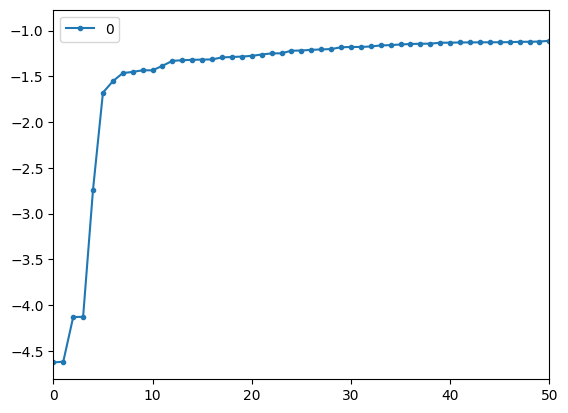

In [19]:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 50], style='.-')
plt.show()

In [20]:
th = np.sort(df_scores)[6]
lof_drop_index = iris[df_scores < th].index
iris.drop(lof_drop_index, inplace=True)
print(lof_drop_index)

Int64Index([9, 12, 13, 24, 32, 37], dtype='int64')


In [21]:
def cat_summary(dataframe, cat_col, plot=False):
    print(pd.DataFrame({cat_col: dataframe[cat_col].value_counts(),
                        "Ratio": 100 * dataframe[cat_col].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[cat_col], data=dataframe)
        plt.show(block=True)

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count    144.000000
mean       5.886111
std        0.815721
min        4.400000
5%         4.615000
10%        4.900000
20%        5.100000
30%        5.400000
40%        5.600000
50%        5.800000
60%        6.100000
70%        6.300000
80%        6.600000
90%        6.900000
95%        7.285000
99%        7.700000
max        7.900000
Name: sepal_length, dtype: float64


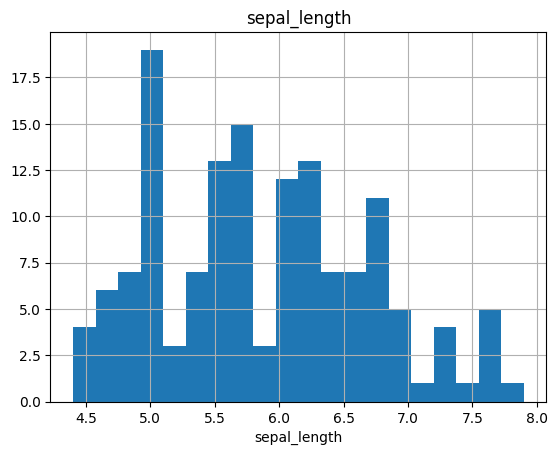

count    144.000000
mean       3.044444
std        0.432714
min        2.000000
5%         2.315000
10%        2.500000
20%        2.700000
30%        2.800000
40%        3.000000
50%        3.000000
60%        3.100000
70%        3.200000
80%        3.400000
90%        3.600000
95%        3.800000
99%        4.114000
max        4.400000
Name: sepal_width, dtype: float64


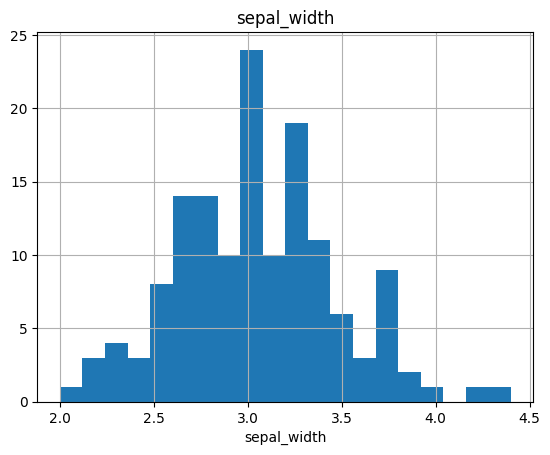

count    144.000000
mean       3.853472
std        1.736443
min        1.000000
5%         1.300000
10%        1.400000
20%        1.500000
30%        1.880000
40%        4.000000
50%        4.400000
60%        4.700000
70%        5.000000
80%        5.400000
90%        5.800000
95%        6.100000
99%        6.700000
max        6.900000
Name: petal_length, dtype: float64


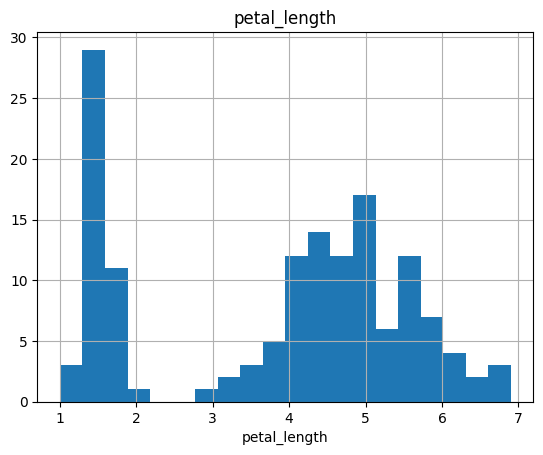

count    144.000000
mean       1.244444
std        0.744375
min        0.200000
5%         0.200000
10%        0.200000
20%        0.300000
30%        0.590000
40%        1.200000
50%        1.350000
60%        1.500000
70%        1.800000
80%        1.940000
90%        2.200000
95%        2.300000
99%        2.500000
max        2.500000
Name: petal_width, dtype: float64


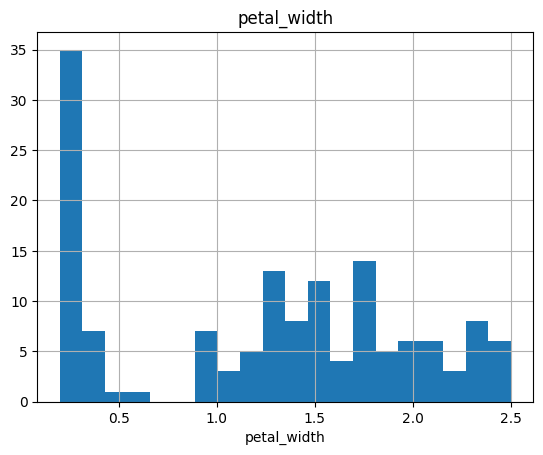

count    144.000000
mean       1.974979
std        0.393855
min        1.277778
5%         1.375507
10%        1.429730
20%        1.500000
30%        1.754902
40%        1.965747
50%        2.035714
60%        2.148148
70%        2.193077
80%        2.256667
90%        2.420000
95%        2.631429
99%        2.788864
max        2.961538
Name: new_sepal_length_width, dtype: float64


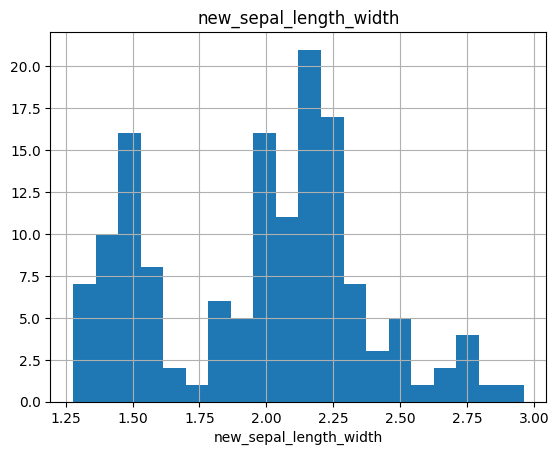

count    144.000000
mean       3.944965
std        1.706281
min        2.125000
5%         2.355652
10%        2.554565
20%        2.684211
30%        2.994118
40%        3.135238
50%        3.266667
60%        3.400000
70%        3.750000
80%        5.000000
90%        7.000000
95%        7.500000
99%        8.000000
max        8.500000
Name: new_petal_length_width, dtype: float64


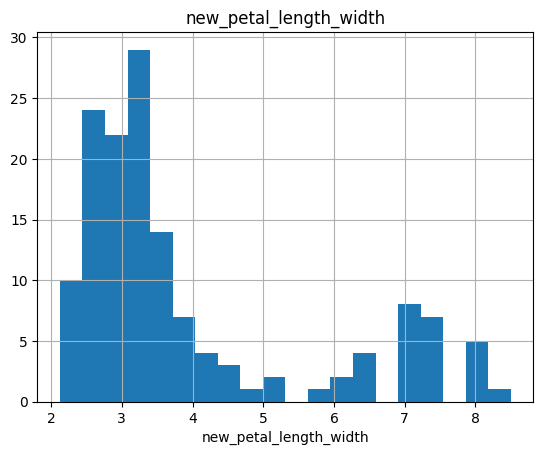

In [22]:
for col in num_cols:
    num_summary(iris, col, plot=True)

            species      Ratio
versicolor       50  34.722222
virginica        50  34.722222
setosa           44  30.555556
##########################################


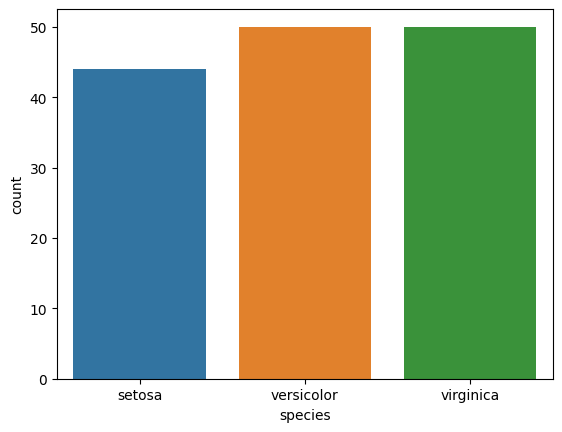

In [23]:
for col in cat_cols:
    cat_summary(iris, col, plot=True)

In [ ]:
setosa = iris[iris['species'] == 'setosa']
versicolor = iris[iris['species'] == 'versicolor']
virginica = iris[iris['species'] == 'virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7)

ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label = 'Setosa',facecolor = 'blue')
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label = 'Versicolor', facecolor = 'red')
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label = 'Virginica', facecolor ='green')

ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')
ax.grid()
ax.set_title("Iris petals")
ax.legend()

In [ ]:
setosa = iris[iris['species'] == 'setosa']
versicolor = iris[iris['species'] == 'versicolor']
virginica = iris[iris['species'] == 'virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7)
ax.scatter(setosa['sepal length (cm)'], setosa['sepal width (cm)'], label = 'Setosa',facecolor = 'blue')
ax.scatter(versicolor['sepal length (cm)'], versicolor['sepal width (cm)'], label = 'Versicolor', facecolor = 'red')
ax.scatter(virginica['sepal length (cm)'], virginica['sepal width (cm)'], label = 'Virginica', facecolor ='green')

ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.grid()
ax.set_title("Iris sepals")
ax.legend()

In [24]:
iris['species'] = iris['species'].apply(lambda x: 1 if x == 'versicolor' else (2 if x == 'virginica' else (3 if x == 'setosa' else 0)))

In [25]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,new_sepal_length_width,new_petal_length_width
0,5.1,3.5,1.4,0.2,3,1.457143,7.000000
1,4.9,3.0,1.4,0.2,3,1.633333,7.000000
2,4.7,3.2,1.3,0.2,3,1.468750,6.500000
3,4.6,3.1,1.5,0.2,3,1.483871,7.500000
4,5.0,3.6,1.4,0.2,3,1.388889,7.000000
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2.233333,2.260870
146,6.3,2.5,5.0,1.9,2,2.520000,2.631579
147,6.5,3.0,5.2,2.0,2,2.166667,2.600000
148,6.2,3.4,5.4,2.3,2,1.823529,2.347826


In [26]:
y = iris['species']
X = iris.drop(columns='species', axis = 1)

In [28]:
sc = StandardScaler()
iris_scaled = sc.fit_transform(X)
X= pd.DataFrame(iris_scaled, columns=X.columns)

In [30]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [33]:
prediction = knn1.predict(X)

In [34]:
from sklearn import metrics

# Precision Recall scores
print(metrics.classification_report(y, prediction, digits=3))

# Confusion matrix
print(metrics.confusion_matrix(y, prediction))


   



Precision, Recall, Confusion matrix, in training

              precision    recall  f1-score   support

           1      0.923     0.960     0.941        50
           2      0.959     0.940     0.949        50
           3      1.000     0.977     0.989        44

    accuracy                          0.958       144
   macro avg      0.961     0.959     0.960       144
weighted avg      0.959     0.958     0.959       144

[[48  2  0]
 [ 3 47  0]
 [ 1  0 43]]
